In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler

# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("input/kag_risk_factors_cervical_cancer.csv")
df.shape

(858, 36)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [11]:
print(df.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [13]:
# remove all stds column (too much na value)
df1 = df.iloc[:, :12]
df2 = df.iloc[:, -4:]

df = pd.concat([df1, df2], axis="columns")

In [15]:
df.shape

(858, 16)

In [17]:
print(df.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


In [19]:
df = df.replace([np.inf, -np.inf], np.nan)

In [21]:
df.shape

(858, 16)

In [23]:
nan_columns = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [31]:
df = df.dropna()

In [33]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(int)

In [35]:
df.shape

(668, 16)

In [37]:
# Features selection (10 best correlation)
corr = df.corr()['Biopsy'].abs().sort_values(ascending=False)

k = 10
selected_features = corr[1:k+1].index.tolist()

new_df = df[selected_features + ['Biopsy']]

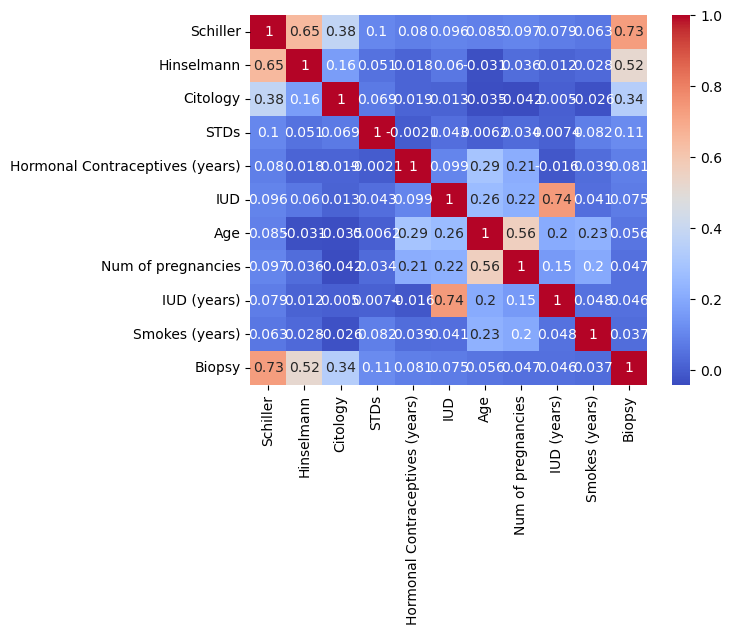

In [39]:
# correlation matrix
corr = new_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [41]:
df[df["Biopsy"] == 1].shape

(45, 16)

In [43]:
df[df["Biopsy"] == 0].shape

(623, 16)

In [45]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [47]:
df.rename(columns = {
    'Age': 'age',
    'Number of sexual partners':'number_of_sexual_partners',
    'First sexual intercourse':'first_sexual_intercourse',
    'Num of pregnancies':'number_of_pregnancies',
    'Smokes':'smokes',
    'Smokes (years)':'smokes_years',
    'Smokes (packs/year)': 'smokes_packs_year',
    'Hormonal Contraceptives':'hormonal_contraceptives',
    'Hormonal Contraceptives (years)':'hormonal_contraceptives_years',
    'IUD':'iud',
    'IUD (years)': 'iud_years',
    'STDs':'stds',
    'Hinselmann':'hinselmann',
    'Schiller':'schiller',
    'Citology':'citology',
    'Biopsy': 'biopsy'
}, inplace=True)
    

In [49]:
df.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'number_of_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year',
       'hormonal_contraceptives', 'hormonal_contraceptives_years', 'iud',
       'iud_years', 'stds', 'hinselmann', 'schiller', 'citology', 'biopsy'],
      dtype='object')

In [51]:
df.head(3)

,age,number_of_sexual_partners,first_sexual_intercourse,number_of_pregnancies,smokes,smokes_years,smokes_packs_year,hormonal_contraceptives,hormonal_contraceptives_years,iud,iud_years,stds,hinselmann,schiller,citology,biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0


In [53]:
X = df.drop(['biopsy'], axis="columns")
y = df['biopsy']

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before oversampling: ")
print(y.value_counts())

print("After oversampling: ")
print(y_resampled.value_counts())

Before oversampling: 
biopsy
0    623
1     45
Name: count, dtype: int64
After oversampling: 
biopsy
0    623
1    623
Name: count, dtype: int64


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=64)

In [57]:
# Define base learners (models to be stacked)
base_learners = [
    ('decision_tree', DecisionTreeClassifier()),  # Base learner 1: Decision Tree
    ('random_forest', RandomForestClassifier(n_estimators=50)),  # Base learner 2: Random Forest
    ('svm', SVC(probability=True))  # Base learner 3: Support Vector Machine (SVM)
]

# Define meta-learner (model to combine the predictions of base learners)
meta_learner = LogisticRegression()

# Build the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,  # Base learners
    final_estimator=meta_learner,  # Meta learner
    cv=5  # 5-fold cross-validation
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Classifier: {accuracy * 100:.2f}%")

Accuracy of Stacking Classifier: 99.20%


In [59]:
# Save the model as a pickle file
model_filename = 'stacking_classifier_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(stacking_clf, file)

print(f"Model saved as {model_filename}")

Model saved as stacking_classifier_model.pkl


In [61]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_resampled, y_resampled)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.9469519483870966


C:\Users\Rishab\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rishab\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rishab\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rishab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

In [65]:
regression = LogisticRegression(C=1, penalty='l2', solver='liblinear')
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.9331550802139037

In [67]:
with open('model.pkl', 'wb') as f:
    pickle.dump(regression, f)

In [69]:
coefficients = regression.coef_[0]

In [71]:
print(coefficients)

[-2.56977125e-02 -1.28289966e-03 -6.28994061e-02  8.67407123e-02
  6.54153556e-01 -4.92382896e-02  8.09461277e-02  4.69469625e-01
 -1.66124844e-02 -1.40053492e-01  7.68757465e-02  5.90818370e-01
  8.85125140e-01  4.47981009e+00  1.65651391e+00]
